In [1]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, BasicAer, IBMQ
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.extensions import Initialize
from qiskit_textbook.tools import random_state, array_to_latex


In [2]:
qr = QuantumRegister(3, name="q")
crz = ClassicalRegister(1, name="crz")
crx = ClassicalRegister(1, name="crx")
teleportation_circuit = QuantumCircuit(qr, crz, crx)


In [3]:
# Telamon?
def create_bell_pair(qc, a, b):
    """creates a bell pair in qc using qubits a & b"""
    qc.h(a)
    qc.cx(a,b)


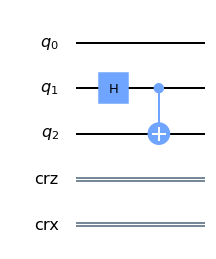

In [6]:
qr = QuantumRegister(3, name = "q")
crz, crx = ClassicalRegister(1, name="crz"), ClassicalRegister(1, name="crx")
teleportation_circuit = QuantumCircuit(qr, crz, crx)

create_bell_pair(teleportation_circuit, 1, 2)
teleportation_circuit.draw('mpl')


In [7]:
def alice_gates(qc, psi, a):
    qc.cx(psi, a)
    qc.h(psi)

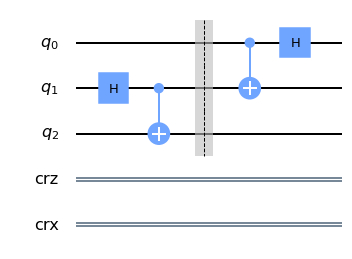

In [9]:
qr = QuantumRegister(3, name="q")
crz, crx = ClassicalRegister(1, name="crz"), ClassicalRegister(1, name="crx")
teleportation_circuit = QuantumCircuit(qr, crz, crx)

create_bell_pair(teleportation_circuit, 1, 2)

teleportation_circuit.barrier()
alice_gates(teleportation_circuit, 0, 1)
teleportation_circuit.draw('mpl')

In [10]:
def measure_and_send(qc, a, b):
    qc.barrier()
    qc.measure(a,0)
    qc.measure(b,1)

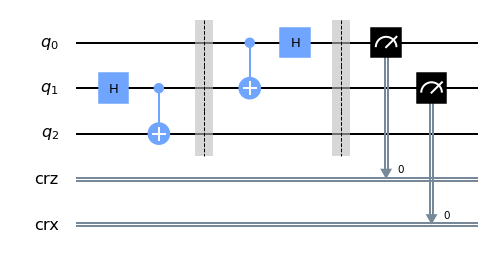

In [14]:
qr = QuantumRegister(3, name="q")
crz, crx = ClassicalRegister(1, name = "crz"), ClassicalRegister(1, name = "crx")
teleportation_circuit = QuantumCircuit(qr, crz, crx)

create_bell_pair(teleportation_circuit, 1, 2)
teleportation_circuit.barrier()
alice_gates(teleportation_circuit, 0, 1)

measure_and_send(teleportation_circuit, 0, 1)
teleportation_circuit.draw('mpl')


In [15]:
def bob_gates(qc, qubit, crz, crx):
    qc.x(qubit).c_if(crx, 1)
    qc.z(qubit).c_if(crz, 1)

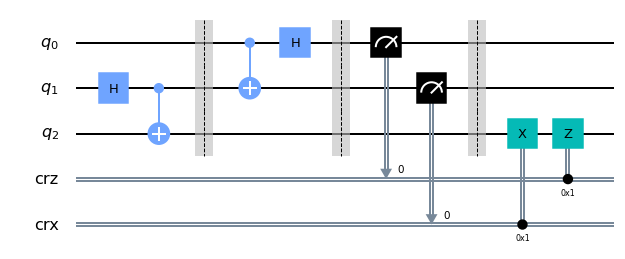

In [20]:
qr = QuantumRegister(3, name = "q")
crz, crx = ClassicalRegister(1, name = "crz"), ClassicalRegister(1, name = "crx")
teleportation_circuit = QuantumCircuit(qr, crz, crx)

create_bell_pair(teleportation_circuit, 1, 2)

teleportation_circuit.barrier()
alice_gates(teleportation_circuit, 0, 1)

measure_and_send(teleportation_circuit, 0, 1)

teleportation_circuit.barrier()
bob_gates(teleportation_circuit, 2, crz, crx)
teleportation_circuit.draw('mpl')

<IPython.core.display.Math object>

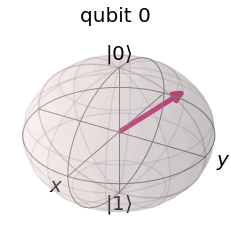

In [26]:
psi = random_state(1)

array_to_latex(psi, pretext = "|\\psi\\rangle = ")

plot_bloch_multivector(psi)

In [27]:
init_gate = Initialize(psi)
init_gate.label = "init"

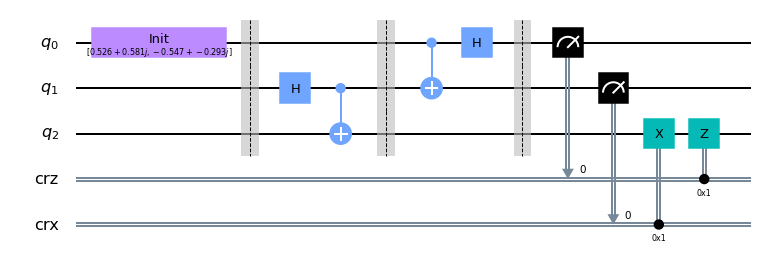

In [28]:
qr = QuantumRegister(3, name = "q")
crz = ClassicalRegister(1, name = "crz")
crx = ClassicalRegister(1, name = "crx")
qc = QuantumCircuit(qr, crz, crx)

qc.append(init_gate, [0])
qc.barrier()

create_bell_pair(qc, 1, 2)
qc.barrier()

alice_gates(qc, 0, 1)

measure_and_send(qc, 0, 1)

bob_gates(qc, 2, crz, crx)

qc.draw('mpl')

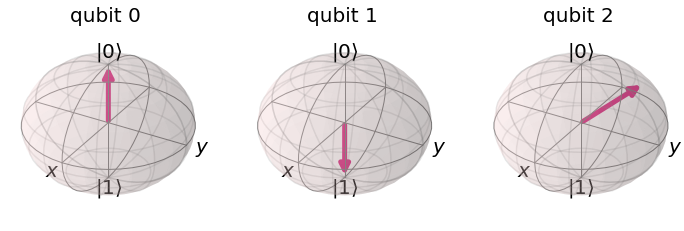

In [29]:
backend = BasicAer.get_backend('statevector_simulator')
out_vector = execute(qc, backend).result().get_statevector()
plot_bloch_multivector(out_vector)

In [30]:
inverse_init_gate = init_gate.gates_to_uncompute()


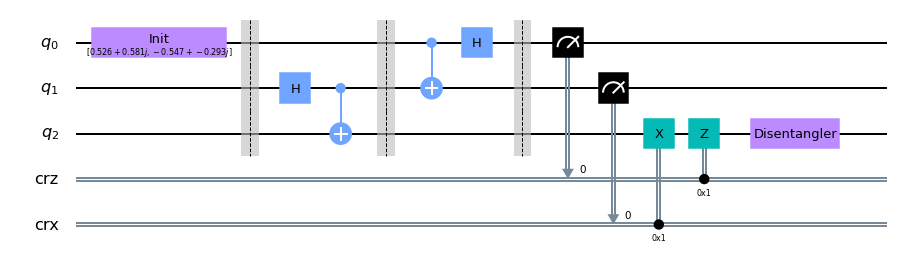

In [32]:
qr = QuantumRegister(3, name = "q")
crz = ClassicalRegister(1, name = "crz")
crx = ClassicalRegister(1, name = "crx")
qc = QuantumCircuit(qr, crz, crx)

qc.append(init_gate, [0])
qc.barrier()

create_bell_pair(qc, 1, 2)
qc.barrier()

alice_gates(qc, 0, 1)

measure_and_send(qc, 0, 1)

bob_gates(qc, 2, crz, crx)

qc.append(inverse_init_gate, [2])

qc.draw('mpl')


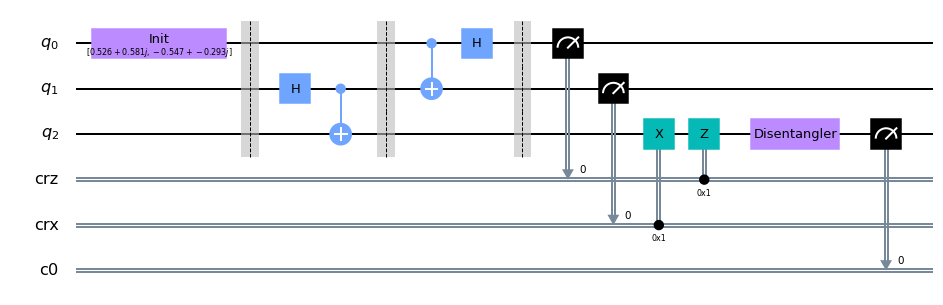

In [33]:
cr_result = ClassicalRegister(1)
qc.add_register(cr_result)
qc.measure(2,2)
qc.draw('mpl')

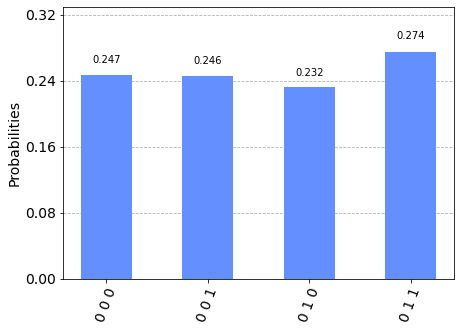

In [35]:
backend = BasicAer.get_backend('qasm_simulator')
counts = execute(qc, backend, shots = 1024).result().get_counts()
plot_histogram(counts)

In [36]:
def new_bob_gates(qc, a, b, c):
    qc.cz(a, c)
    qc.cx(b, c)
    

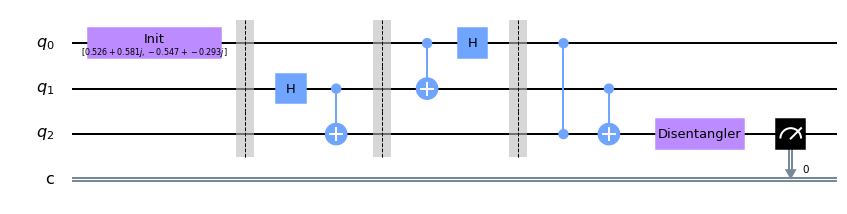

In [37]:
qc = QuantumCircuit(3, 1)

qc.append(init_gate, [0])
qc.barrier()

create_bell_pair(qc, 1, 2)
qc.barrier()

alice_gates(qc, 0, 1)
qc.barrier()

new_bob_gates(qc, 0, 1, 2)
qc.append(inverse_init_gate, [2])
qc.measure(2, 0)
qc.draw('mpl')

In [39]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub = 'ibm-q')
provider.backends()

ibmqfactory.load_account:WARNING:2020-09-30 00:33:33,895: Credentials are already in use. The existing account in the session will be replaced.


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_valencia') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [40]:
from qiskit.providers.ibmq import least_busy
backend = least_busy(provider.backends(filters = lambda b: b.configuration().n_qubits >= 3 and 
                                      not b.configuration().simulator and b.status().operational==True))
job_exp = execute(qc, backend = backend, shots = 8192)

{'0': 7511, '1': 681}


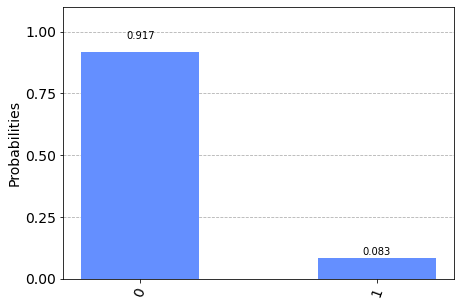

In [42]:
exp_result = job_exp.result()
exp_measurement_result = exp_result.get_counts(qc)
print(exp_measurement_result)
plot_histogram(exp_measurement_result)

In [43]:
error_rate_percent = sum([exp_measurement_result[result] for result in exp_measurement_result.keys() if result[0] == '1']) \
                        * 100./sum(list(exp_measurement_result.values()))
print("The experimental error rate : ", error_rate_percent, '%')

The experimental error rate :  8.31298828125 %


In [44]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.15.2',
 'qiskit-aer': '0.6.1',
 'qiskit-ignis': '0.4.0',
 'qiskit-ibmq-provider': '0.9.0',
 'qiskit-aqua': '0.7.5',
 'qiskit': '0.21.0'}